In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [4]:
fandango.describe().transpose()
# From here we can see that there is a significant difference in average stars showns at fandango vs avg rating of movie

,count,mean,std,min,25%,50%,75%,max
STARS,510.0,3.532353,1.585616,0.0,3.500,4.0,4.5,5.0
RATING,510.0,3.351765,1.512628,0.0,3.025,3.8,4.3,5.0
VOTES,510.0,1134.364706,3809.952176,0.0,2.000,17.5,183.5,34846.0


<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

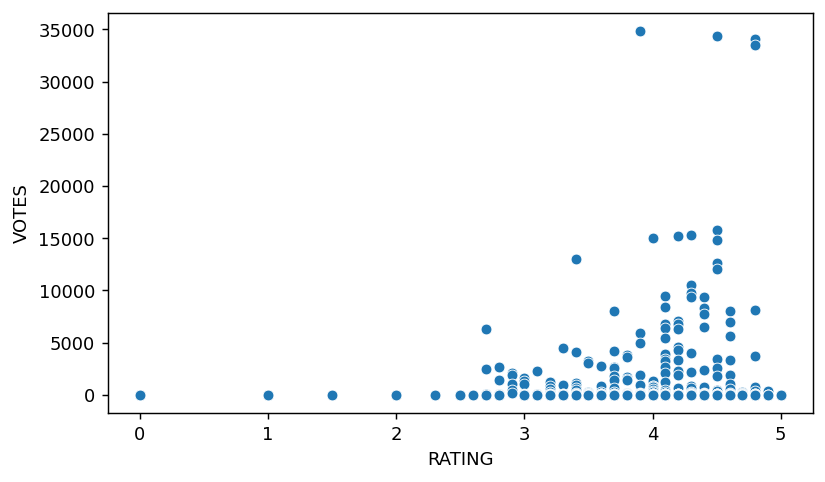

In [5]:
plt.figure(figsize=(7,4),dpi=130)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')

In [6]:
fandango.corr()
# Here also the stars and ratings are not perfectly correlated

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


QUES. Create a new column named Year

In [7]:
title = 'Film Title Name (YEAR)'

In [8]:
# title.split('(')
# title.split('(')[-1]
title.split('(')[-1].replace(')',"")

'YEAR'

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',""))

In [10]:
fandango.head()
# The year here is a String

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


QUES. Visualize the count of movie per year

In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      7
2016      1
1964      1
Name: YEAR, dtype: int64

QUES. Visualize the count of movie per year with plots

<AxesSubplot: xlabel='YEAR', ylabel='count'>

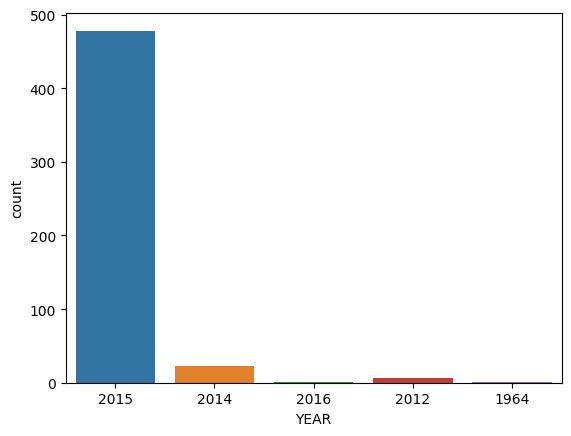

In [12]:
sns.countplot(data=fandango,x='YEAR')

QUES. What are the top 10 movies with highest number of votes

In [13]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


QUES. How many movies have 0 votes

In [14]:
# M1
# fandango['VOTES']==0
# fandango[fandango['VOTES']==0]
len(fandango[fandango['VOTES']==0])

73

In [15]:
# M2
no_votes = fandango['VOTES'] == 0
no_votes.sum()

73

QUES. Create a new DataFrame by removing films with 0 votes

In [16]:
non_zero = fandango[fandango['VOTES']>0]
non_zero

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


Ques. Create a KDE plot

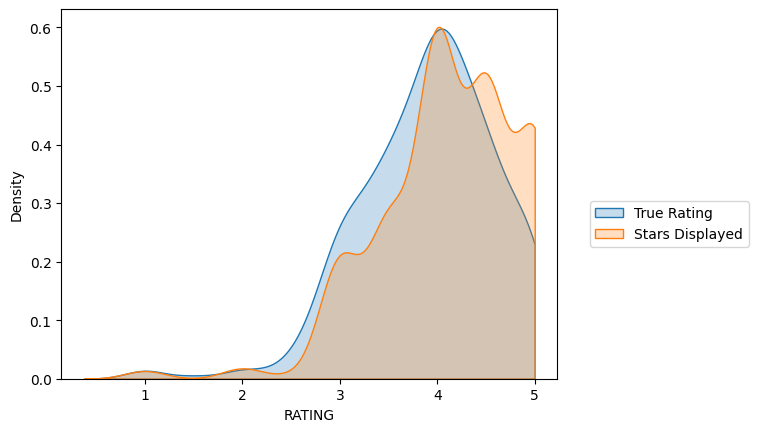

In [17]:
sns.kdeplot(data=non_zero, x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=non_zero, x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(bbox_to_anchor=(1.4,0.5))

QUES. Create a new column as stars difference

In [18]:
non_zero['STARS_DIFF'] = non_zero['STARS'] - non_zero['RATING']

C:\Users\apoor\AppData\Local\Temp\ipykernel_15312\3621021880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero['STARS_DIFF'] = non_zero['STARS'] - non_zero['RATING']


In [19]:
non_zero['STARS_DIFF'] = non_zero['STARS_DIFF'].round(2)

C:\Users\apoor\AppData\Local\Temp\ipykernel_15312\1921736881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero['STARS_DIFF'] = non_zero['STARS_DIFF'].round(2)


In [20]:
non_zero

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [21]:
non_zero.value_counts('STARS_DIFF')

STARS_DIFF
0.0    109
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
dtype: int64

QUES. Create a countplot to display the number of times a certain difference occured

<AxesSubplot: xlabel='STARS_DIFF', ylabel='count'>

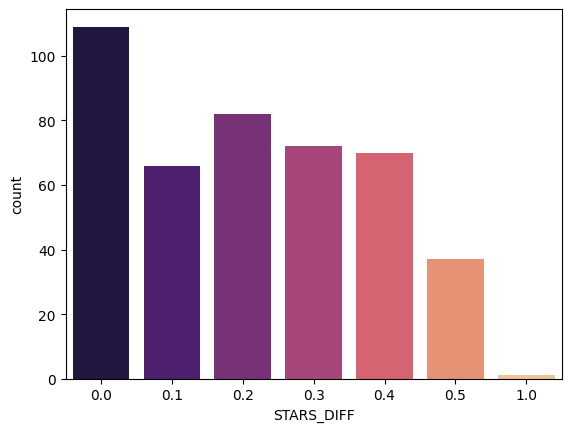

In [22]:
sns.countplot(data=non_zero,x='STARS_DIFF',palette='magma')

QUES. Which movie has 1 star

In [23]:
non_zero[non_zero['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Comparision to Fandango rating to other sites

In [24]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


ROTTEN TOMATOES

Create a scatterplot RT critic review and RT user review

(0.0, 100.0)

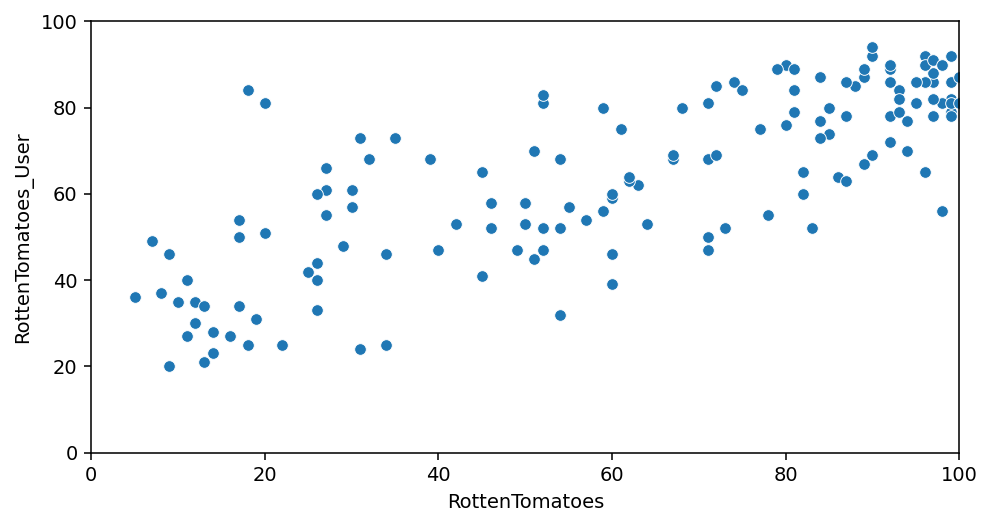

In [26]:
plt.figure(figsize=(8,4),dpi=140)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

QUES. Create a new column for difference of RT critics reviews and RT user reviews

In [27]:
all_sites['RT_Rating_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


QUES. Calculate the average absolute difference

In [28]:
all_sites['RT_Rating_Diff'].apply(abs).mean()

15.095890410958905

QUES. Plot out the distribution curve

<AxesSubplot: xlabel='RT_Rating_Diff', ylabel='Count'>

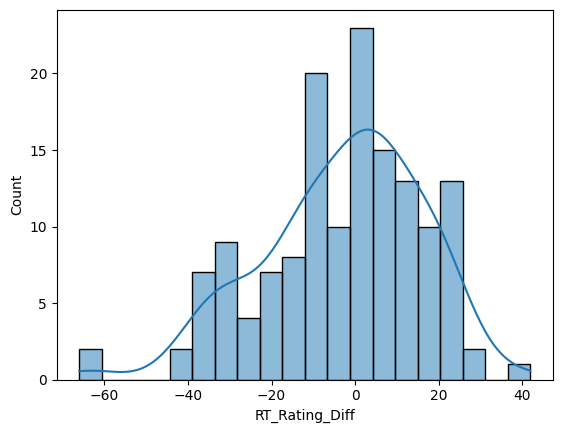

In [29]:
sns.histplot(data=all_sites,x='RT_Rating_Diff',kde=True,bins=20)

<AxesSubplot: xlabel='RT_Rating_Diff', ylabel='Count'>

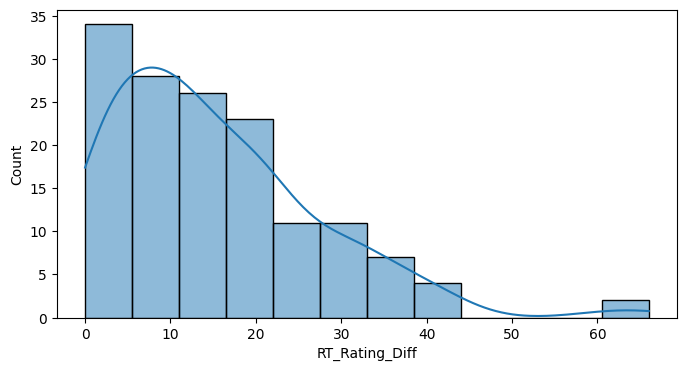

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(x=all_sites['RT_Rating_Diff'].apply(abs),kde=True)

QUES. Find out the movies which are causing the largest difference

What are the top 5 movies users rated higher than the critics

In [31]:
all_sites.nsmallest(5,'RT_Rating_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

What are the top 5 movies critics rated higher than the users

In [32]:
all_sites.nlargest(5,'RT_Rating_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

META CRITIC

QUES. Display a scatterplot for meta critic rating vs meta critic user rating

(0.0, 10.0)

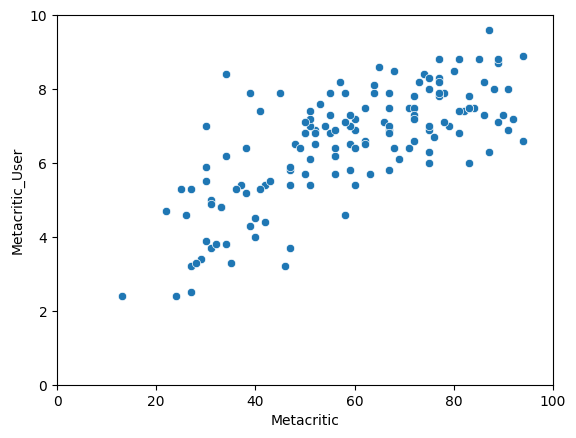

In [33]:
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

QUES. Plot a scatterplot for IMDB votes count vs MetaCritic votes count

<AxesSubplot: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

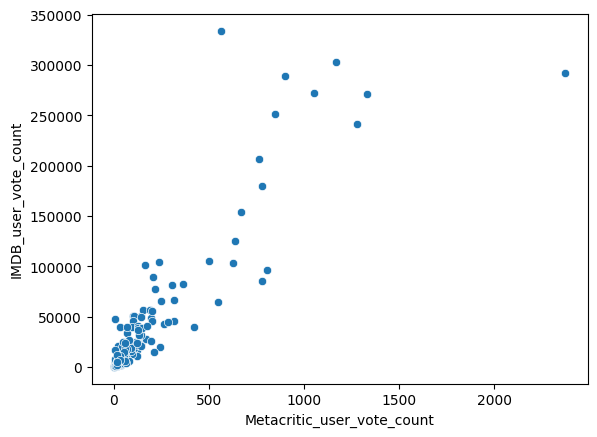

In [34]:
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

QUES. Find the movie with highest vote count on IMBD and MetaCritic

In [35]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [36]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


FANDANGO SCORES vs ALL SITES SCORES

QUES. Combine the fandango scores with all sites table. Not every movie is in the All sites table, since some fandango movies have very little or no reviews. We only want to compare movies that are in both the DataFrames, so do an inner merge to merge together both DataFrames based on the FILM column

In [38]:
new = pd.merge(fandango,all_sites,how='inner',on='FILM')
new

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


NORMALIZE COLUMNS TO FANDANGO STARS and RATINGS 0-5

In [46]:
new.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RT_Rating_Diff                    42.0
Name: max, dtype: float64

In [48]:
new['RT_Norm'] = np.round(new['RottenTomatoes']/20,1)
new['RTU_Norm'] = np.round(new['RottenTomatoes_User']/20,1)
new['MC_Norm'] = np.round(new['Metacritic']/20,1)
new['MCU_Norm'] = np.round(new['Metacritic_User']/2,1)
new['IMDB_Norm'] = np.round(new['IMDB']/2,1)
new.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Rating_Diff,RT_Norm,RTU_Norm,MC_Norm,MCU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


QUES. Now create a norm scores data frame that only contains normalized scores data

You can create this by passing the list of norm scores columns

In [49]:
new.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'RT_Rating_Diff',
       'RT_Norm', 'RTU_Norm', 'MC_Norm', 'MCU_Norm', 'IMDB_Norm'],
      dtype='object')

In [50]:
norm = new[['FILM', 'STARS', 'RATING','RT_Norm', 'RTU_Norm', 'MC_Norm', 'MCU_Norm', 'IMDB_Norm']]
norm.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,MC_Norm,MCU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


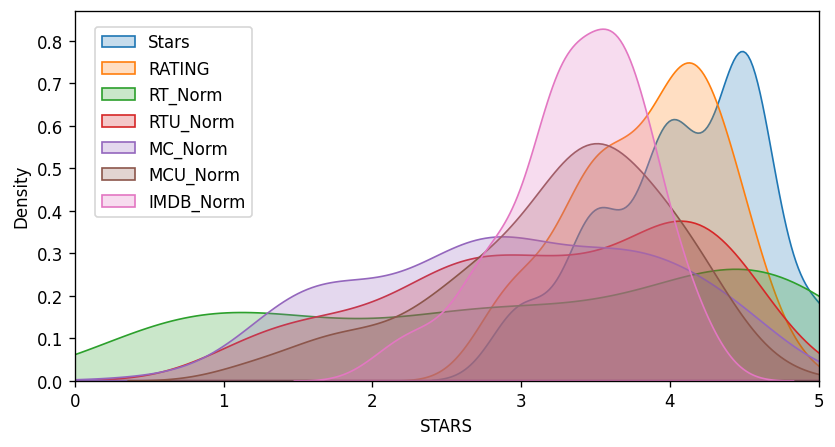

In [88]:
plt.figure(figsize=(8,4),dpi=120)
sns.kdeplot(data=norm,x='STARS',fill=True,label='Stars')
sns.kdeplot(data=norm,x='RATING',fill=True,label='RATING')
sns.kdeplot(data=norm,x='RT_Norm',fill=True,label='RT_Norm')
sns.kdeplot(data=norm,x='RTU_Norm',fill=True,label='RTU_Norm')
sns.kdeplot(data=norm,x='MC_Norm',fill=True,label='MC_Norm')
sns.kdeplot(data=norm,x='MCU_Norm',fill=True,label='MCU_Norm')
sns.kdeplot(data=norm,x='IMDB_Norm',fill=True,label='IMDB_Norm')
plt.xlim(0,5)
plt.legend(bbox_to_anchor=(0.25,0.98));

<AxesSubplot: ylabel='Density'>

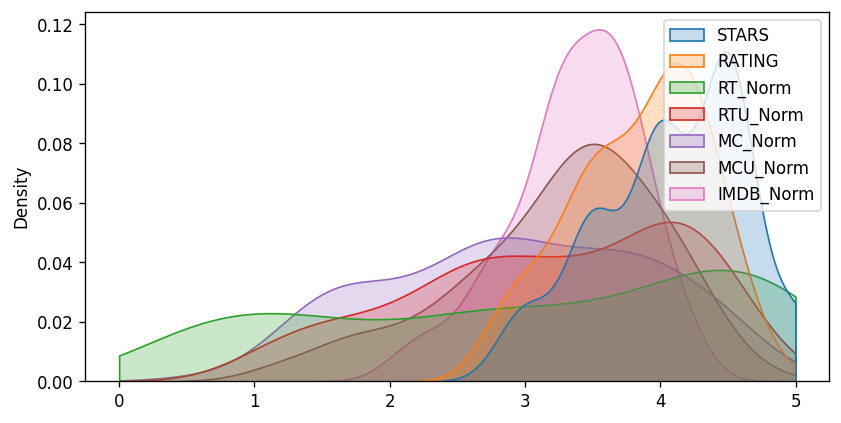

In [86]:
plt.figure(figsize=(8,4),dpi=120)
sns.kdeplot(data=norm,fill=True,clip=(0,5))